In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv("advertising.csv")

In [6]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
#Checking null values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
# Checking duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [11]:
df.duplicated().sum()

np.int64(0)

<Axes: >

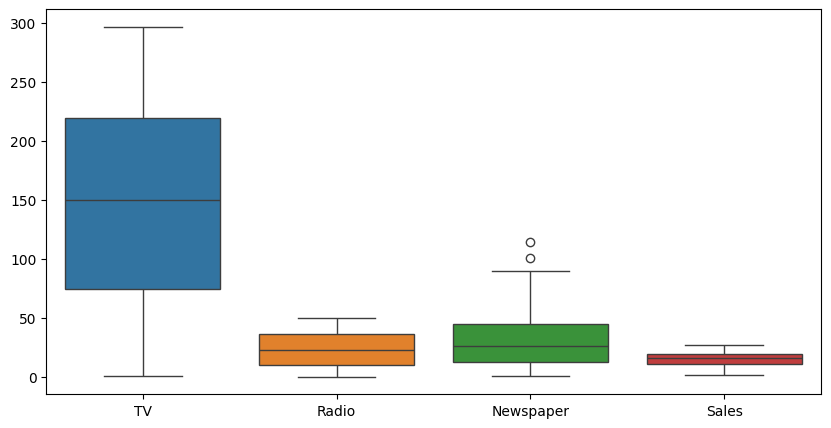

In [12]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=df, ax=ax)

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


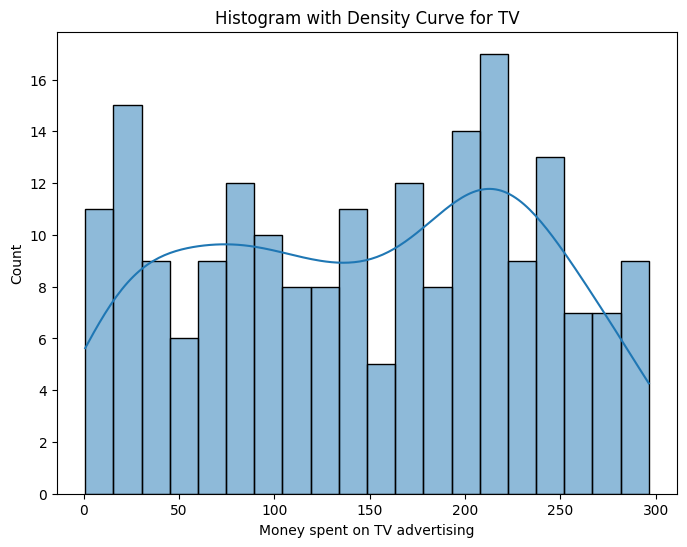

In [14]:
#Histogram with Density curve for TV Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['TV'],bins=20, kde=True)
ax.set_xlabel('Money spent on TV advertising')
ax.set_title('Histogram with Density Curve for TV')
plt.show()

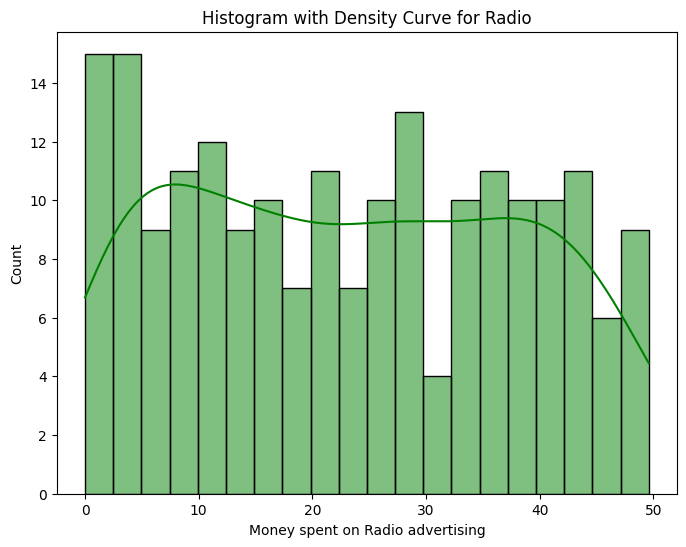

In [15]:
#Histogram with Density curve for Radio Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Radio'],bins=20,color='green', kde=True)
ax.set_xlabel('Money spent on Radio advertising')
ax.set_title('Histogram with Density Curve for Radio')
plt.show()

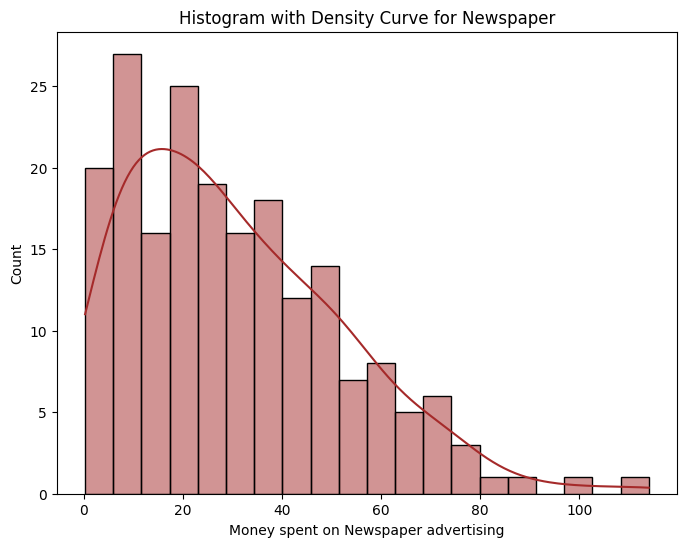

In [16]:
#Histogram with Density curve for Newspaper Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Newspaper'],bins=20,color='brown', kde=True)
ax.set_xlabel('Money spent on Newspaper advertising')
ax.set_title('Histogram with Density Curve for Newspaper')
plt.show()

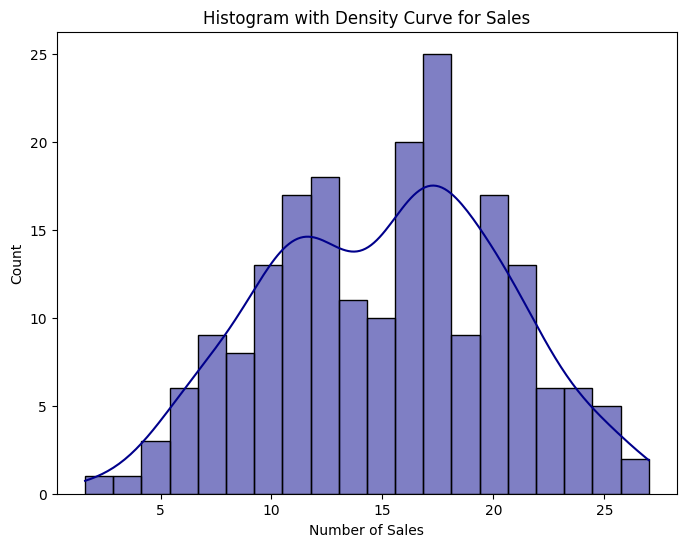

In [17]:
#Histogram with Density curve for Sales Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(df['Sales'],bins=20,color='darkblue', kde=True)
ax.set_xlabel('Number of Sales')
ax.set_title('Histogram with Density Curve for Sales')
plt.show()

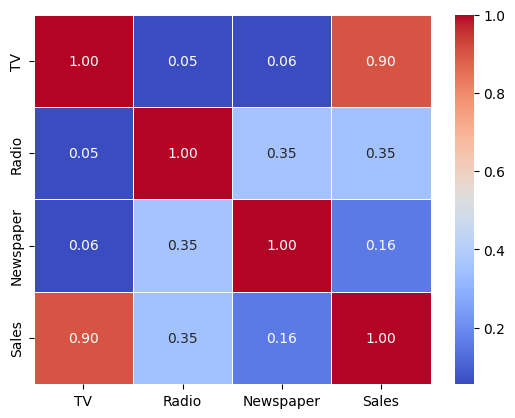

In [18]:
# Checking relationship between variables
fig,ax=plt.subplots()
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

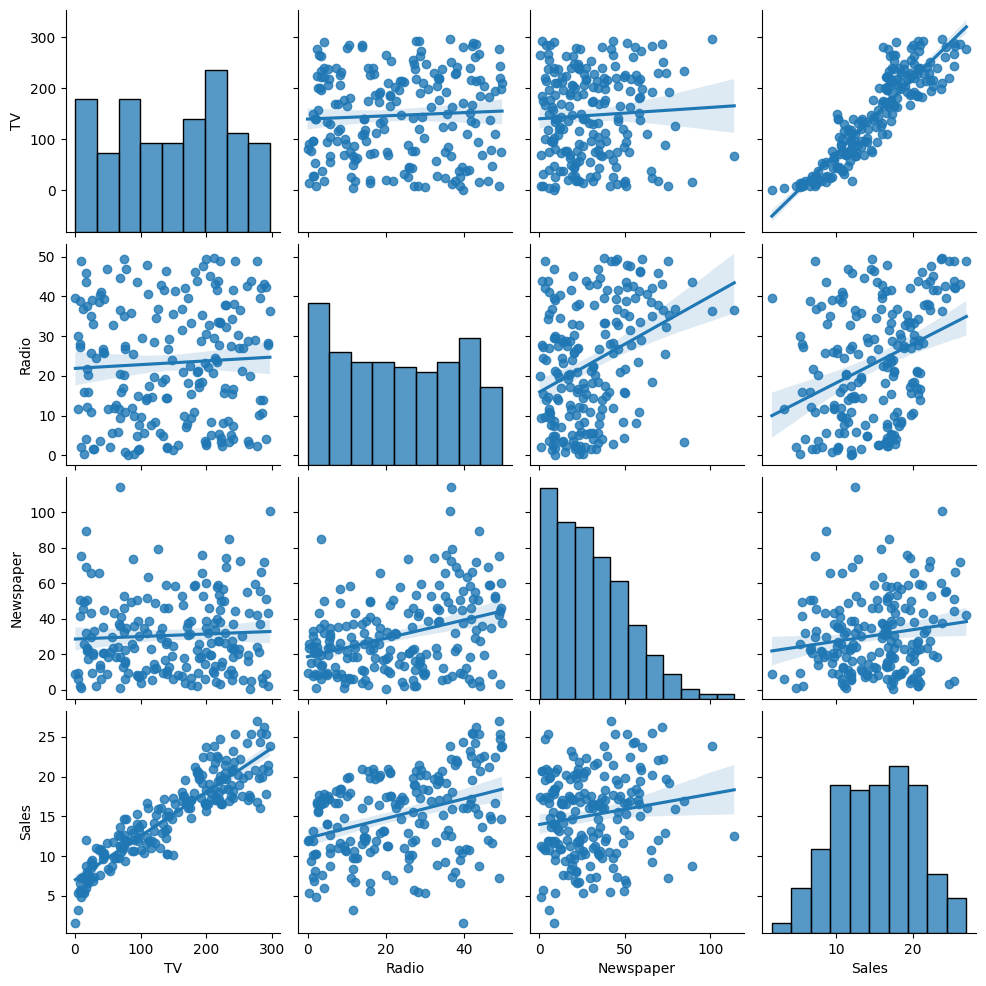

In [19]:
#Correlogram
sns.pairplot(df, kind='reg')

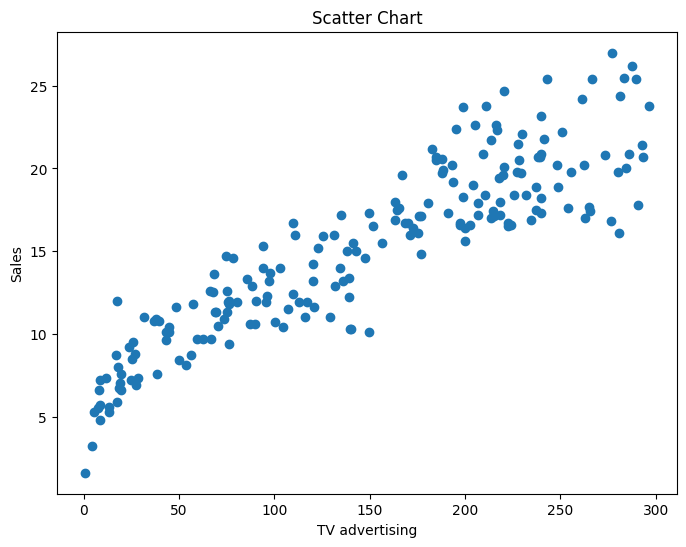

In [20]:
#Relationship of Sales against TV Advertising
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(x='TV',y='Sales',data=df,marker='o')
ax.set_xlabel('TV advertising')
ax.set_ylabel('Sales')
ax.set_title("Scatter Chart")
plt.show()


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF for Sales against each features
df_vif = df.drop('Sales', axis=1)
df_vif = df_vif.apply(pd.to_numeric, errors= 'coerce')

vif_data= pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] =[variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
print(vif_data)

     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [23]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= df[['TV', 'Radio','Newspaper']]
y=df['Sales']

#Split dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

train_data= x_train.join(y_train)
train_data

,TV,Radio,Newspaper,Sales
160,172.5,18.1,30.7,16.4
167,206.8,5.2,19.4,17.2
92,217.7,33.5,59.0,19.4
119,19.4,16.0,22.3,6.6
87,110.7,40.6,63.2,16.0
...,...,...,...,...
159,131.7,18.4,34.6,12.9
166,17.9,37.6,21.6,8.0
174,222.4,3.4,13.1,16.5
126,7.8,38.9,50.6,6.6


In [24]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data[['TV', 'Radio','Newspaper']], train_data['Sales']

#Build a Linear Regression model
fitted_model = LinearRegression()
#Train the model
fitted_model.fit(x_train,y_train)
#Make predictions
y_pred = fitted_model.predict(x_test)

In [25]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE =  mean_squared_error(y_test, y_pred) 
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  3.5255248735422255
Mean absolute error value is:  1.2335553267935457
R2 score value is:  0.8540710873870853


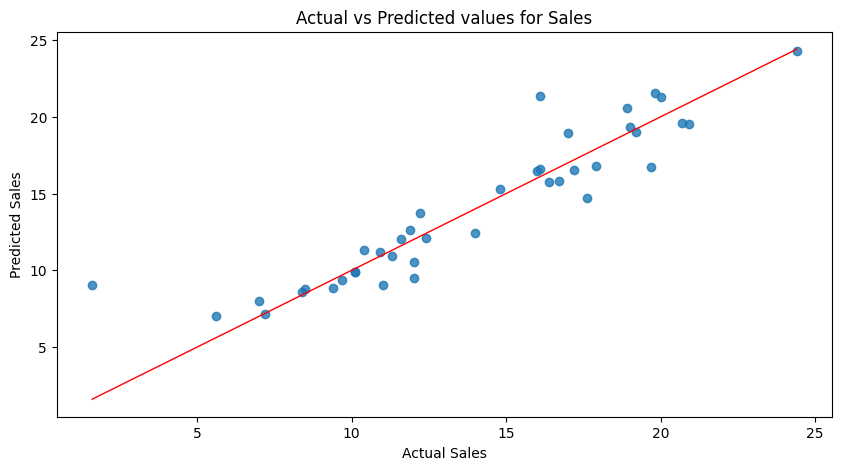

In [26]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred,alpha=0.8)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=1)
plt.title('Actual vs Predicted values for Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [27]:
x.tail(10)

,TV,Radio,Newspaper
190,39.5,41.1,5.8
191,75.5,10.8,6.0
192,17.2,4.1,31.6
193,166.8,42.0,3.6
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [28]:
y.tail(10)

190    10.8
191    11.9
192     5.9
193    19.6
194    17.3
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, dtype: float64

In [31]:
# Create new trial dataframe to testing

data = {'TV': [200], 'Radio': [20] ,'Newspaper': [10]}
trial_data = pd.DataFrame(data)

In [32]:
# Predict rating using trial data
predict_rating = fitted_model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  17.721037067806172
